In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pygrib as pgr
from PIL import Image
import datetime
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from wrf import getvar
from osgeo import gdal


#These are just temporary save-file names for testing..
SaveFileName = 'OverviewTest.png'
NewSaveFileName = 'OverviewTest_optimized.png'
NewSaveFileName2 = 'OverviewTest_optimized_2.png'



#This is a temporary example filename of raw Harmonie Data. Try any filename (preferably at timestep 001
#to get accurate rain and snow data examples) from Minio or the DMI FTP server.
Filename = "2023-07-04_00_00_00/data/d01/wrfout_d01_2023-07-04_00_00_00.hdf"
ncfile = Dataset(Filename)





In [5]:
#Get the relevant variables from the wrfout file
wrf_out_file = Filename

ds_lon = gdal.Open('NETCDF:"'+wrf_out_file+'":XLONG')
ds_lat = gdal.Open('NETCDF:"'+wrf_out_file+'":XLAT')
ds_u10 = gdal.Open('NETCDF:"'+wrf_out_file+'":U10')
ds_v10 = gdal.Open('NETCDF:"'+wrf_out_file+'":V10')
ds_t2 = gdal.Open('NETCDF:"'+wrf_out_file+'":T2')
ds_psfc = gdal.Open('NETCDF:"'+wrf_out_file+'":PSFC')
ds_precip = gdal.Open('NETCDF:"'+wrf_out_file+'":RAINNC')
ds_snow = gdal.Open('NETCDF:"'+wrf_out_file+'":SNOWNC')
ds_cloud = gdal.Open('NETCDF:"'+wrf_out_file+'":CLDFRA')
ds_sst = gdal.Open('NETCDF:"'+wrf_out_file+'":SST')
ds_sst_input = gdal.Open('NETCDF:"'+wrf_out_file+'":SST_INPUT')

#More variables on the way
# ds_sst_input = gdal.Open('NETCDF:"'+wrf_out_file+'":SST_INPUT')


x = ds_lon.ReadAsArray()
y = ds_lat.ReadAsArray()

#Wind
u10 = ds_u10.ReadAsArray()
v10 = ds_v10.ReadAsArray()
windspeed=np.sqrt(u10**2+v10**2)

uquiver = u10 / np.sqrt(u10 ** 2 + v10 ** 2) * 10
vquiver = v10 / np.sqrt(u10 ** 2 + v10 ** 2) * 10


#Temperature
t2 = ds_t2.ReadAsArray()-273.15

#SST's from model and input from wrflowinput file
sst = ds_sst.ReadAsArray()-273.15
sst_input = ds_sst_input.ReadAsArray()-273.15

#Pressure (this is unstable atm, waiting for mslp values later)
# psfc = ds_psfc.ReadAsArray()/100
psfc = ds_psfc.ReadAsArray()

#Precipitation
precip = ds_precip.ReadAsArray()
snow = ds_snow.ReadAsArray()

#Cloud Cover
c1 = ds_cloud.ReadAsArray()



# fig = plt.figure(figsize=(24, 13.5),dpi=655.6)

Warning 1: Several 1D variables are indexed by dimension Time
Warning 1: Several 1D variables are indexed by dimension Time
Warning 1: Several 1D variables are indexed by dimension Time
Warning 1: Several 1D variables are indexed by dimension Time
Warning 1: Several 1D variables are indexed by dimension Time
Warning 1: Several 1D variables are indexed by dimension Time
Warning 1: Several 1D variables are indexed by dimension Time
Warning 1: Several 1D variables are indexed by dimension Time
Warning 1: Several 1D variables are indexed by dimension Time
Warning 1: No 1D variable is indexed by dimension bottom_top
Warning 1: Several 1D variables are indexed by dimension Time
Warning 1: Several 1D variables are indexed by dimension Time


/tmp/ipykernel_553/225543858.py:110: UserWarning: No contour levels were found within the data range.
  contour3 = ax.contour(wind_lons,wind_lats,psfc,levels=levels,colors='black')
/tmp/ipykernel_553/225543858.py:115: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(contour0, ax=ax, extend="neither",location="bottom", pad=-0.2, fraction=0.021, shrink=0.3, orientation='horizontal')
/tmp/ipykernel_553/225543858.py:285: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar1 = plt.colorbar(contour1, ax=ax, extend="neither",location="right", pad=-0.05, fraction=0.021, shrink=0.3, orientation='vertical')
/tmp/ipykernel_553/225543858.py:375: MatplotlibDeprecationWarning: The 'extend' 

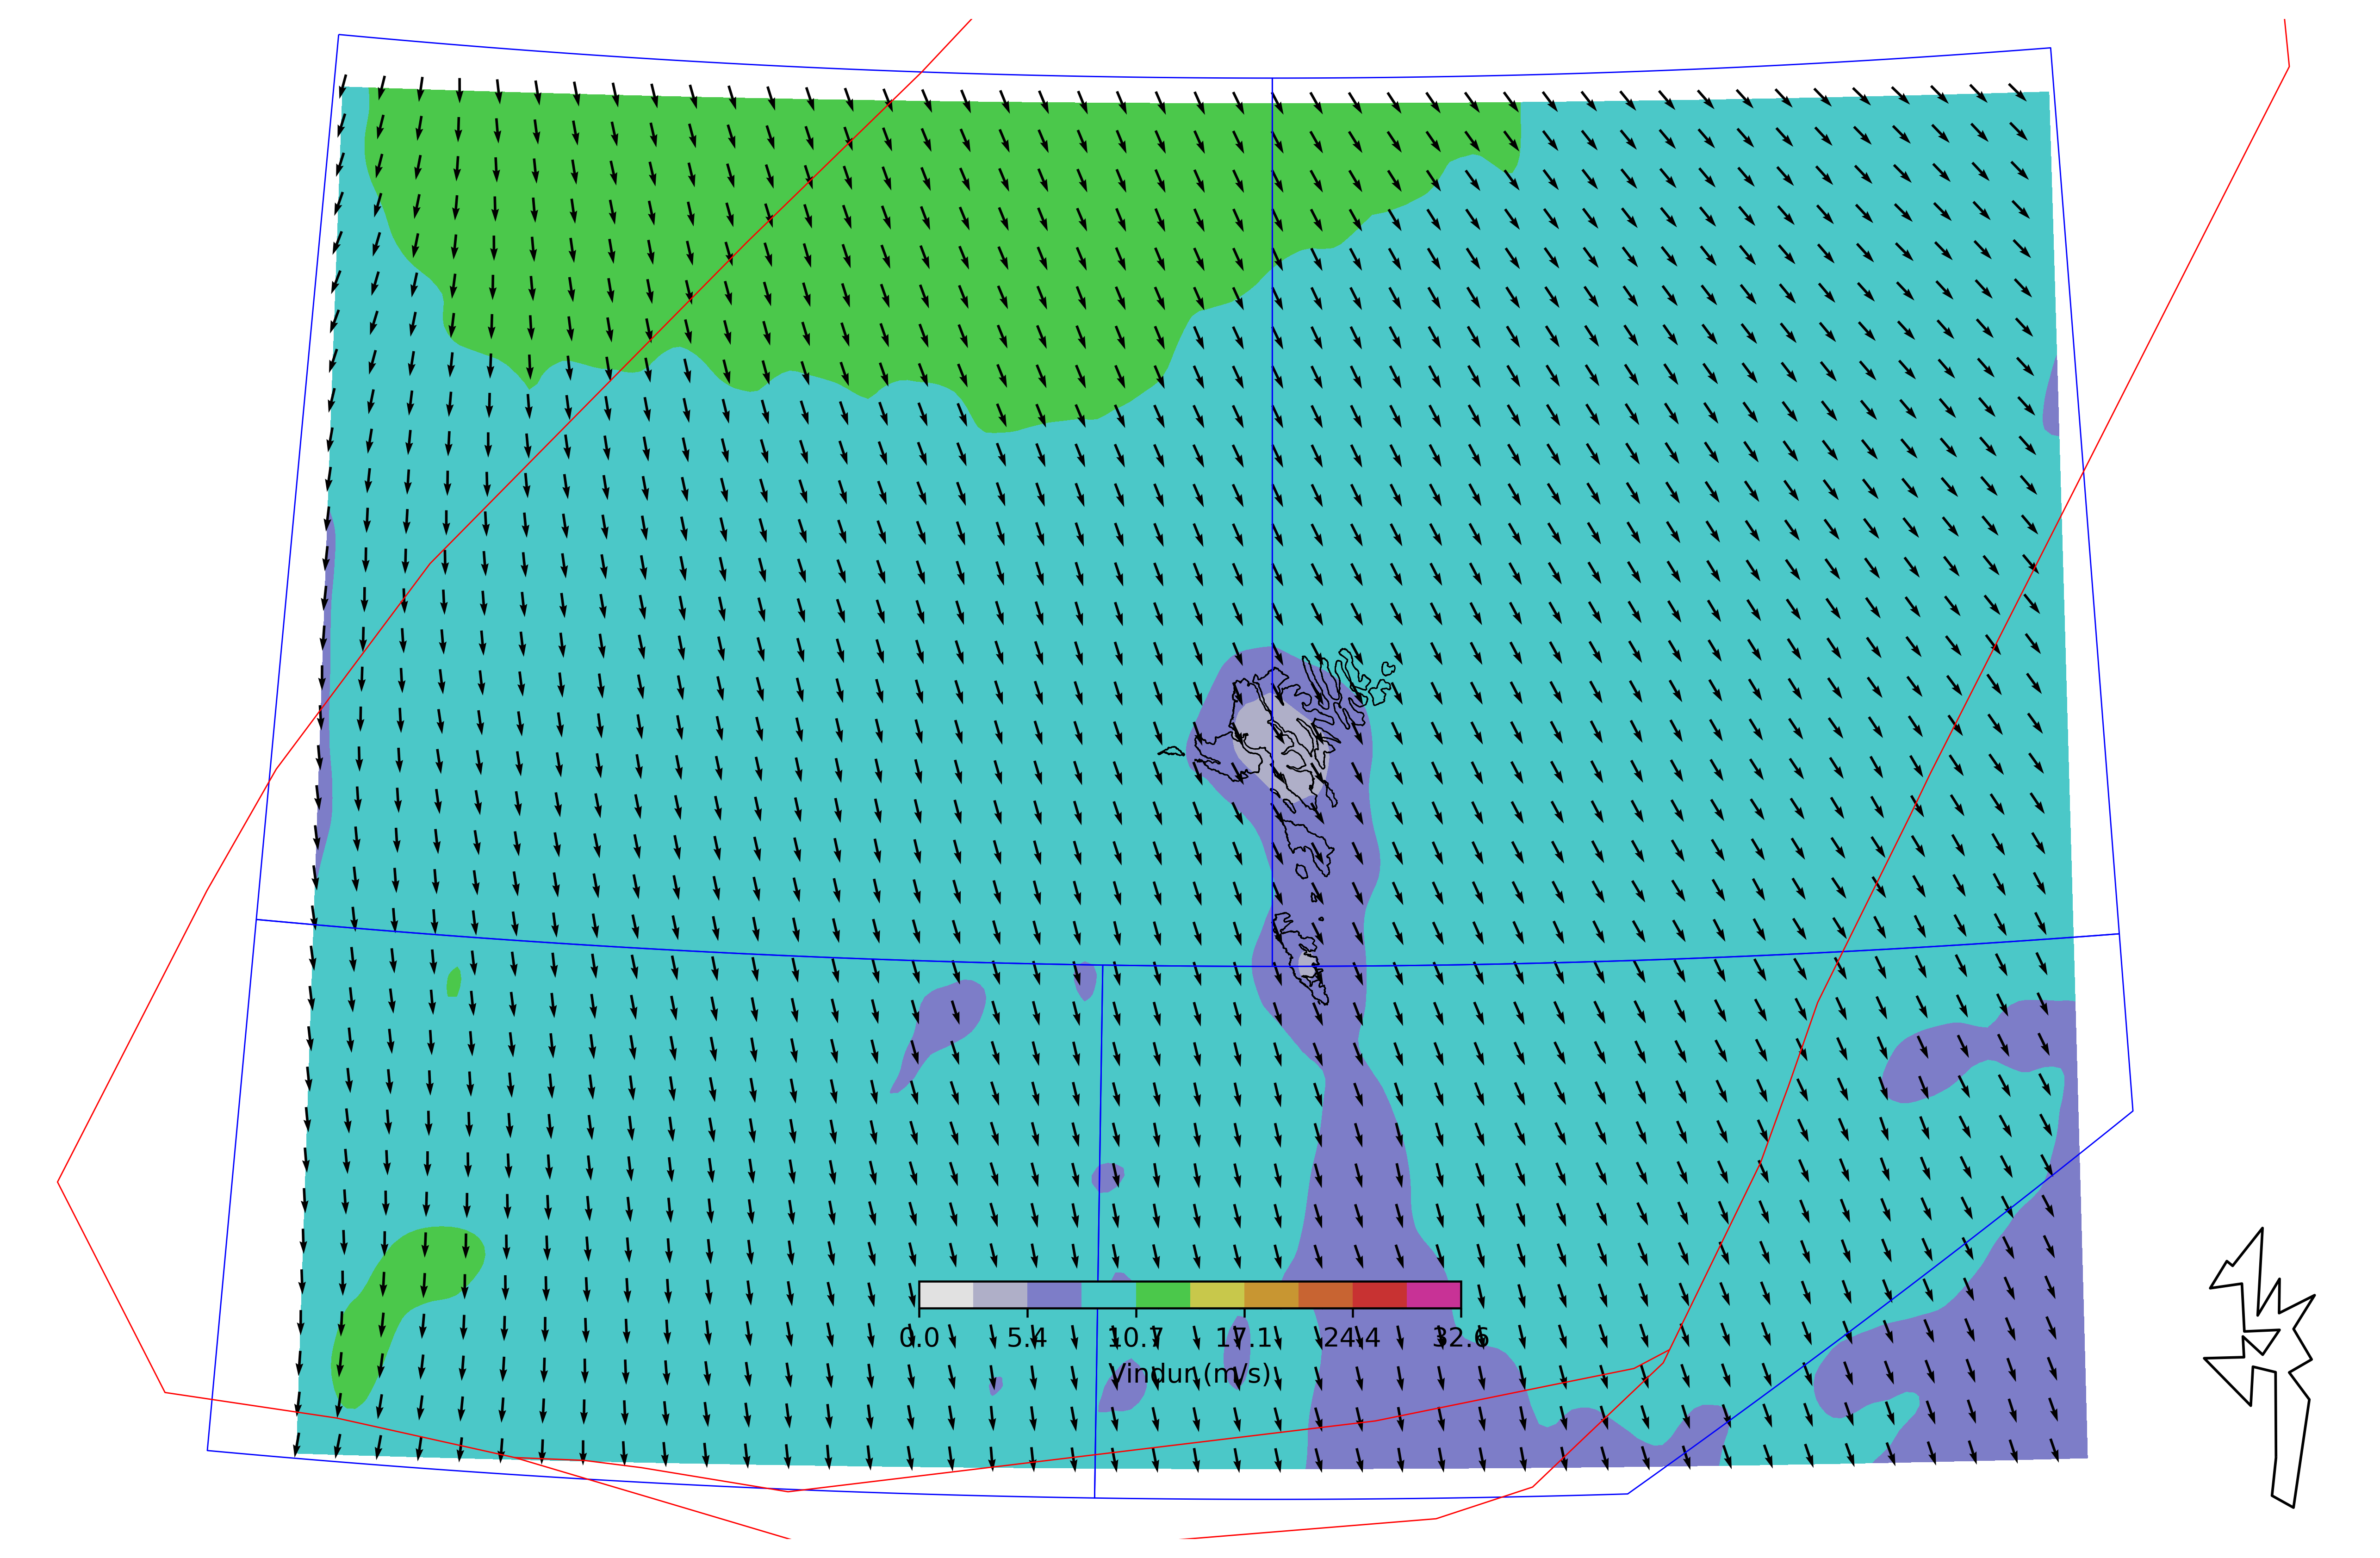

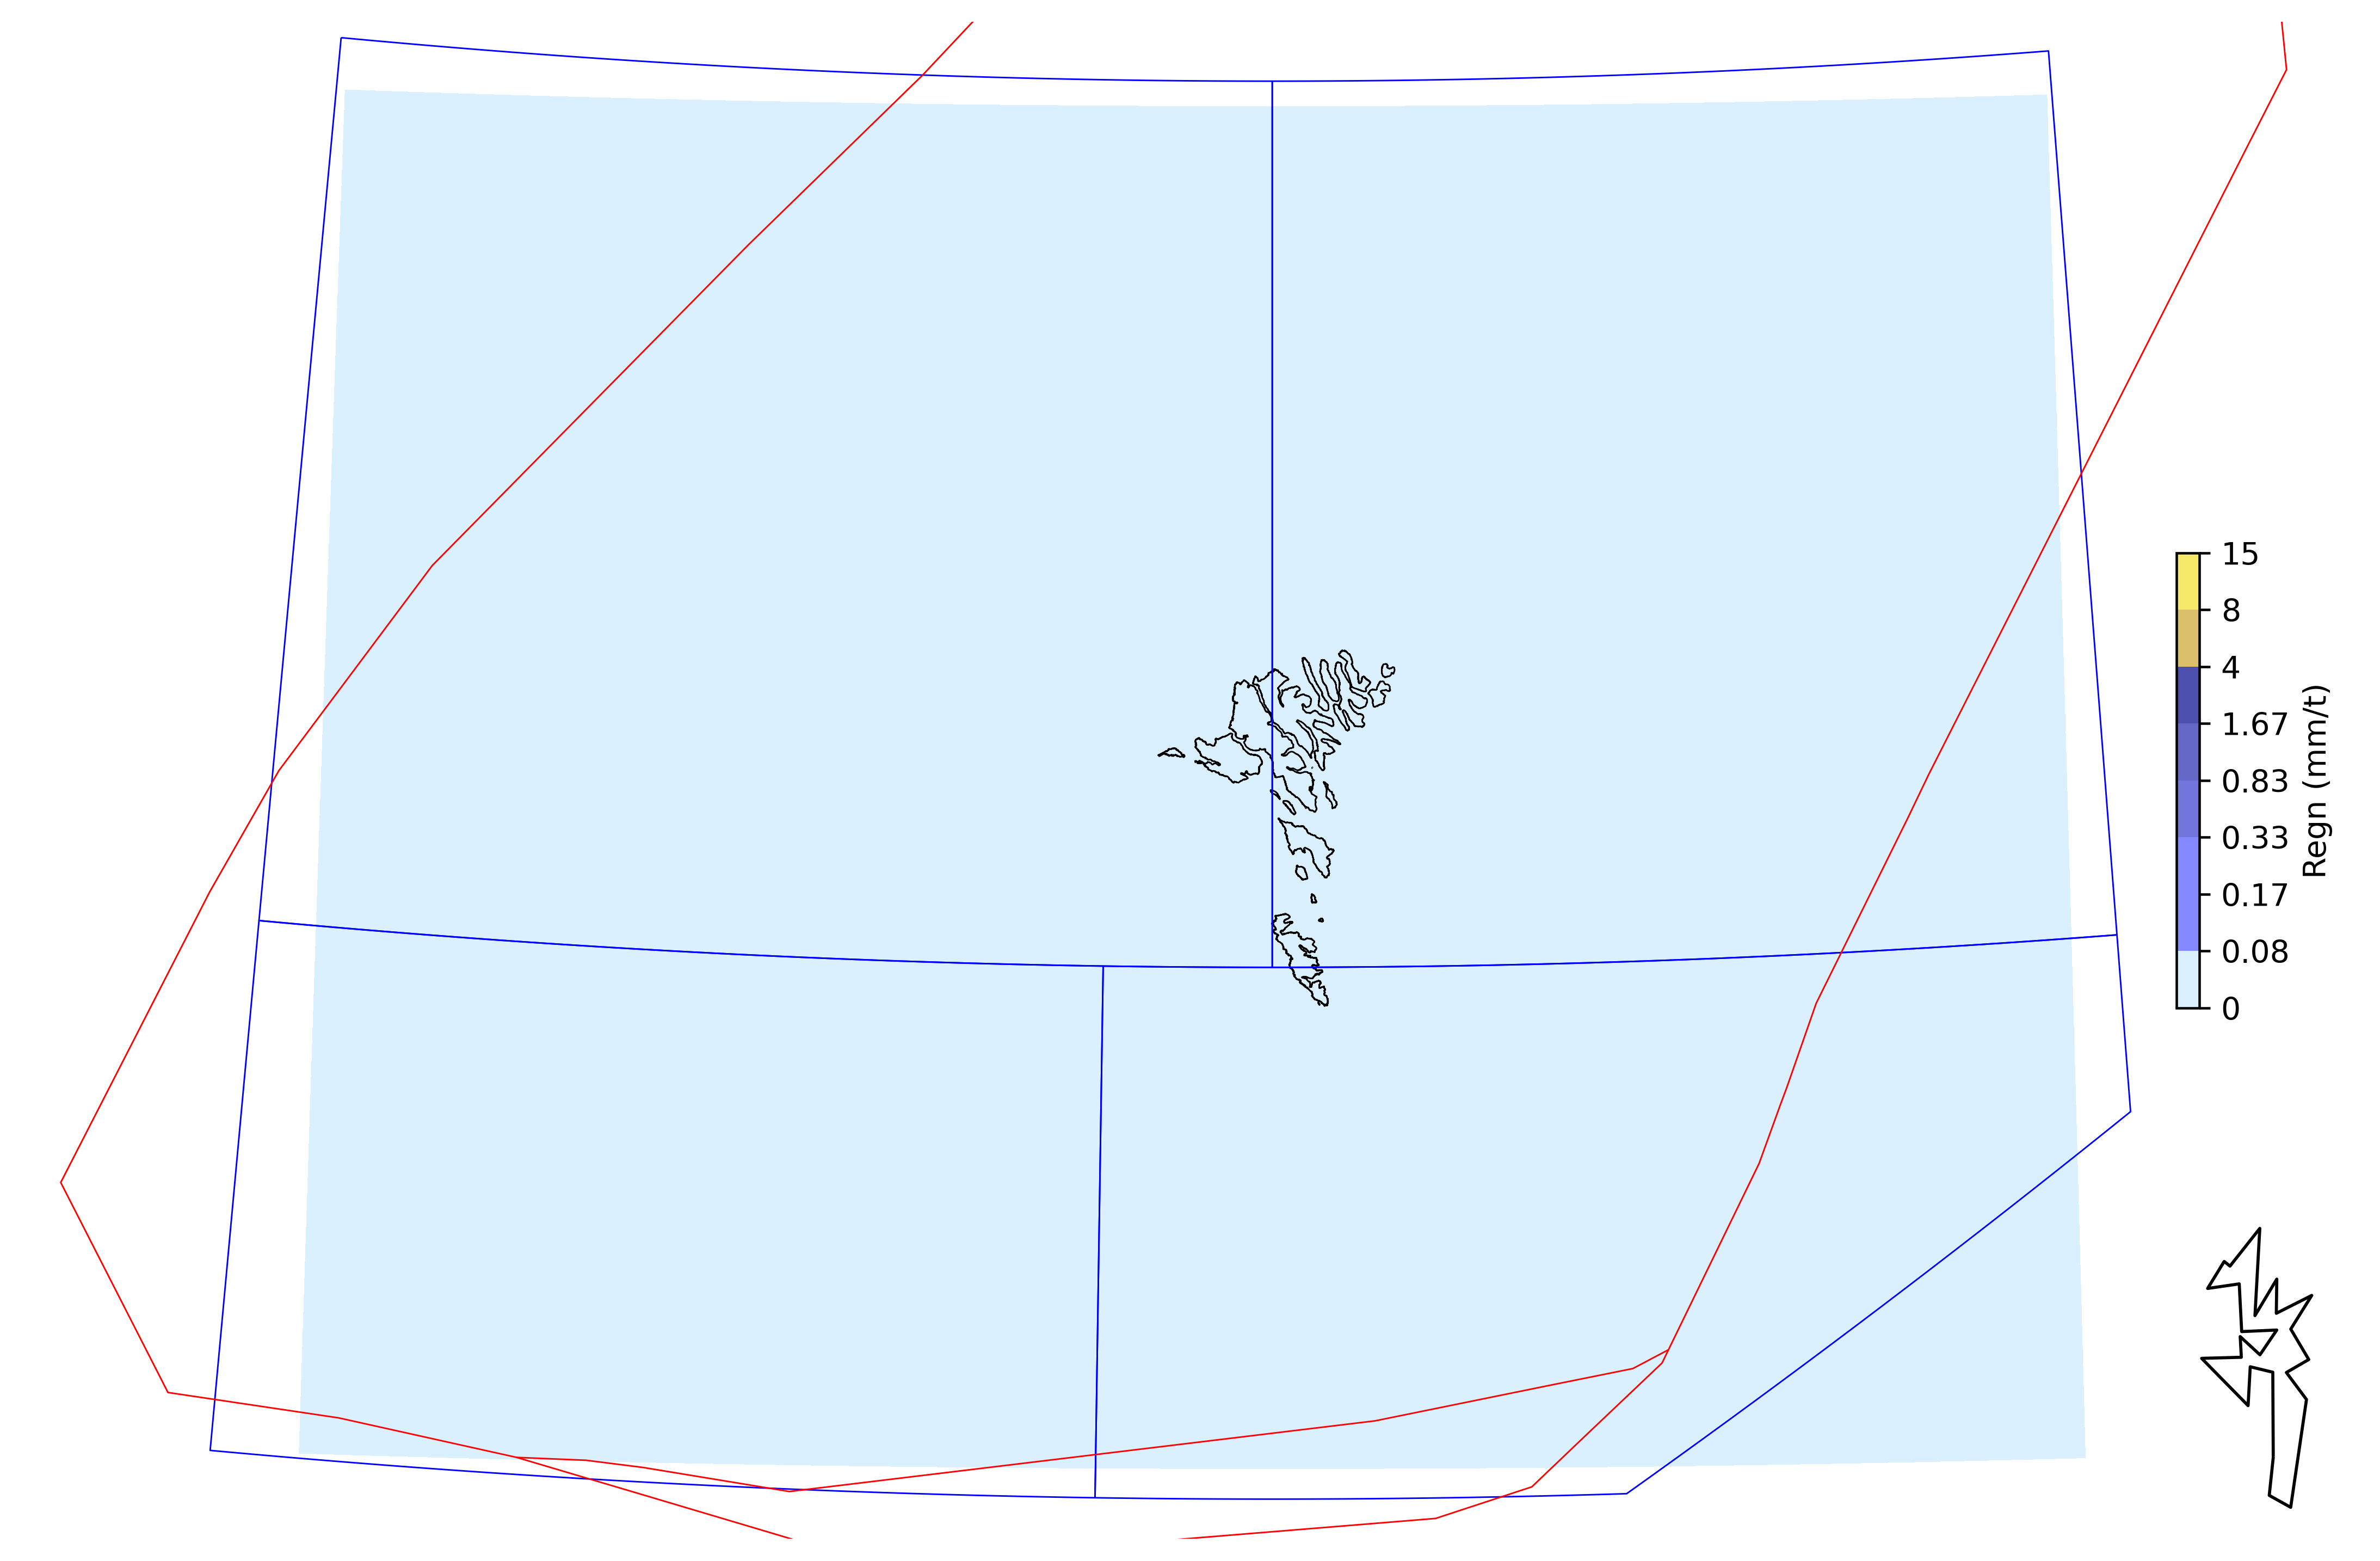

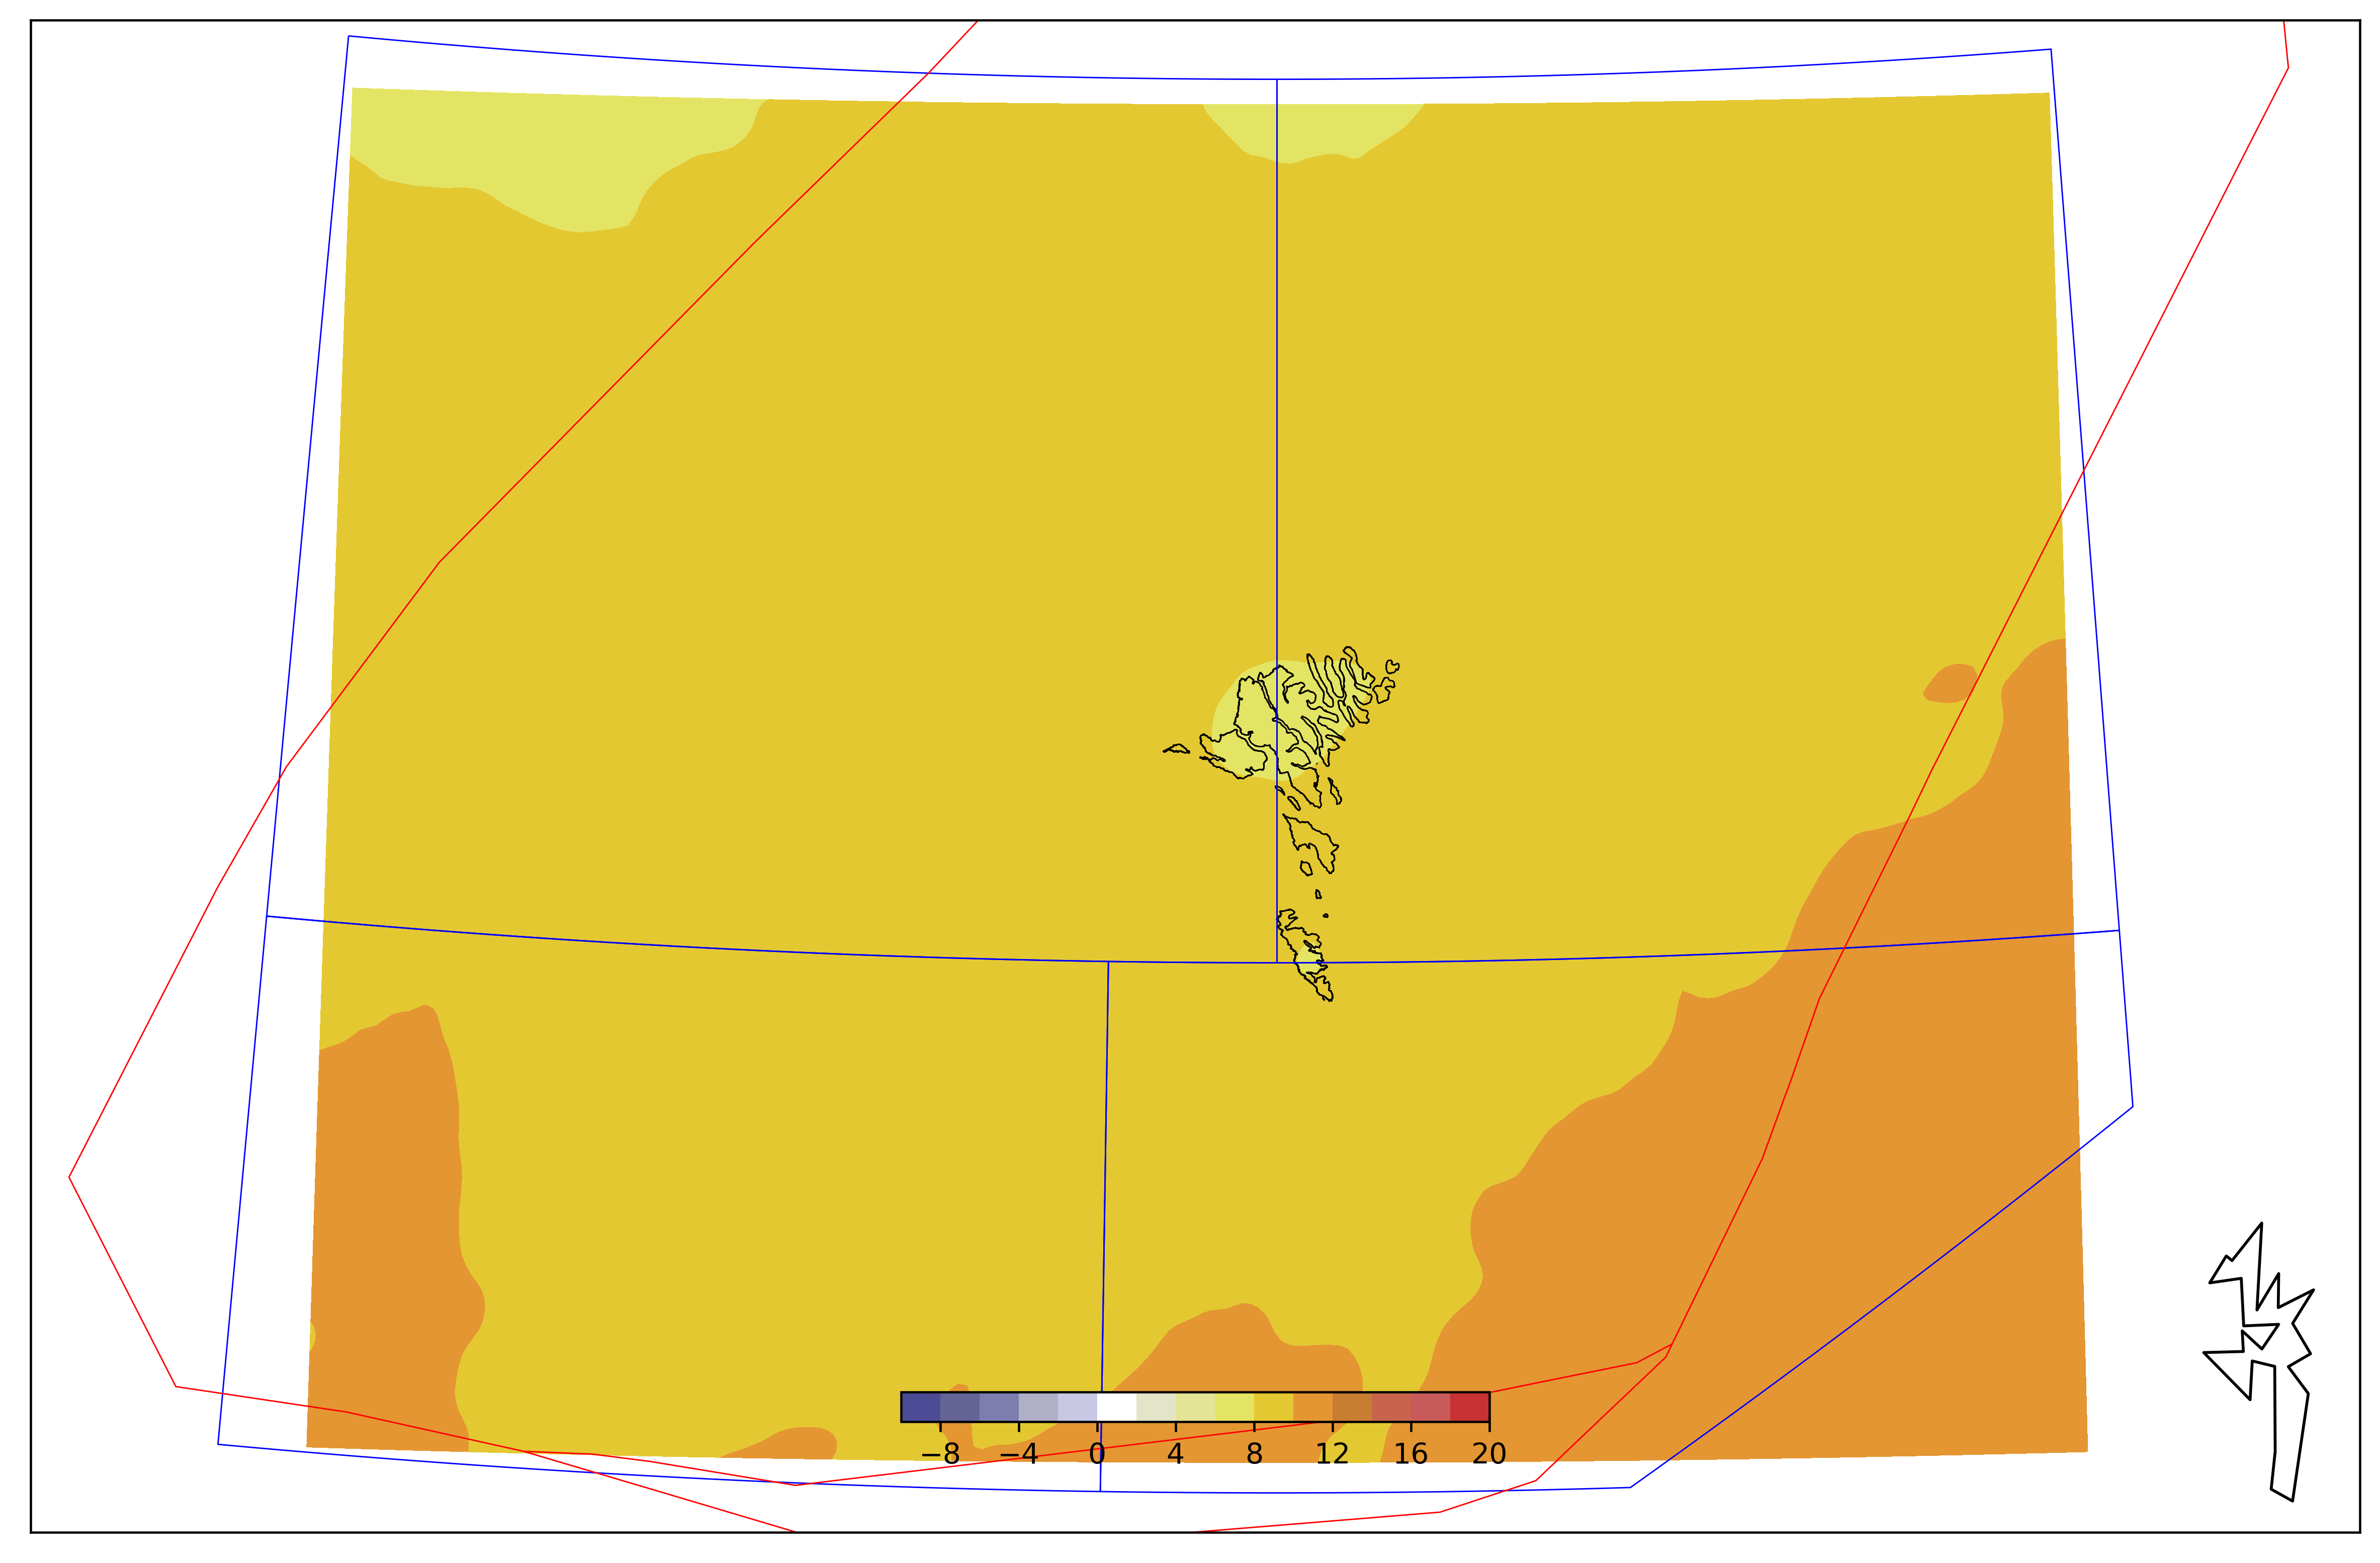

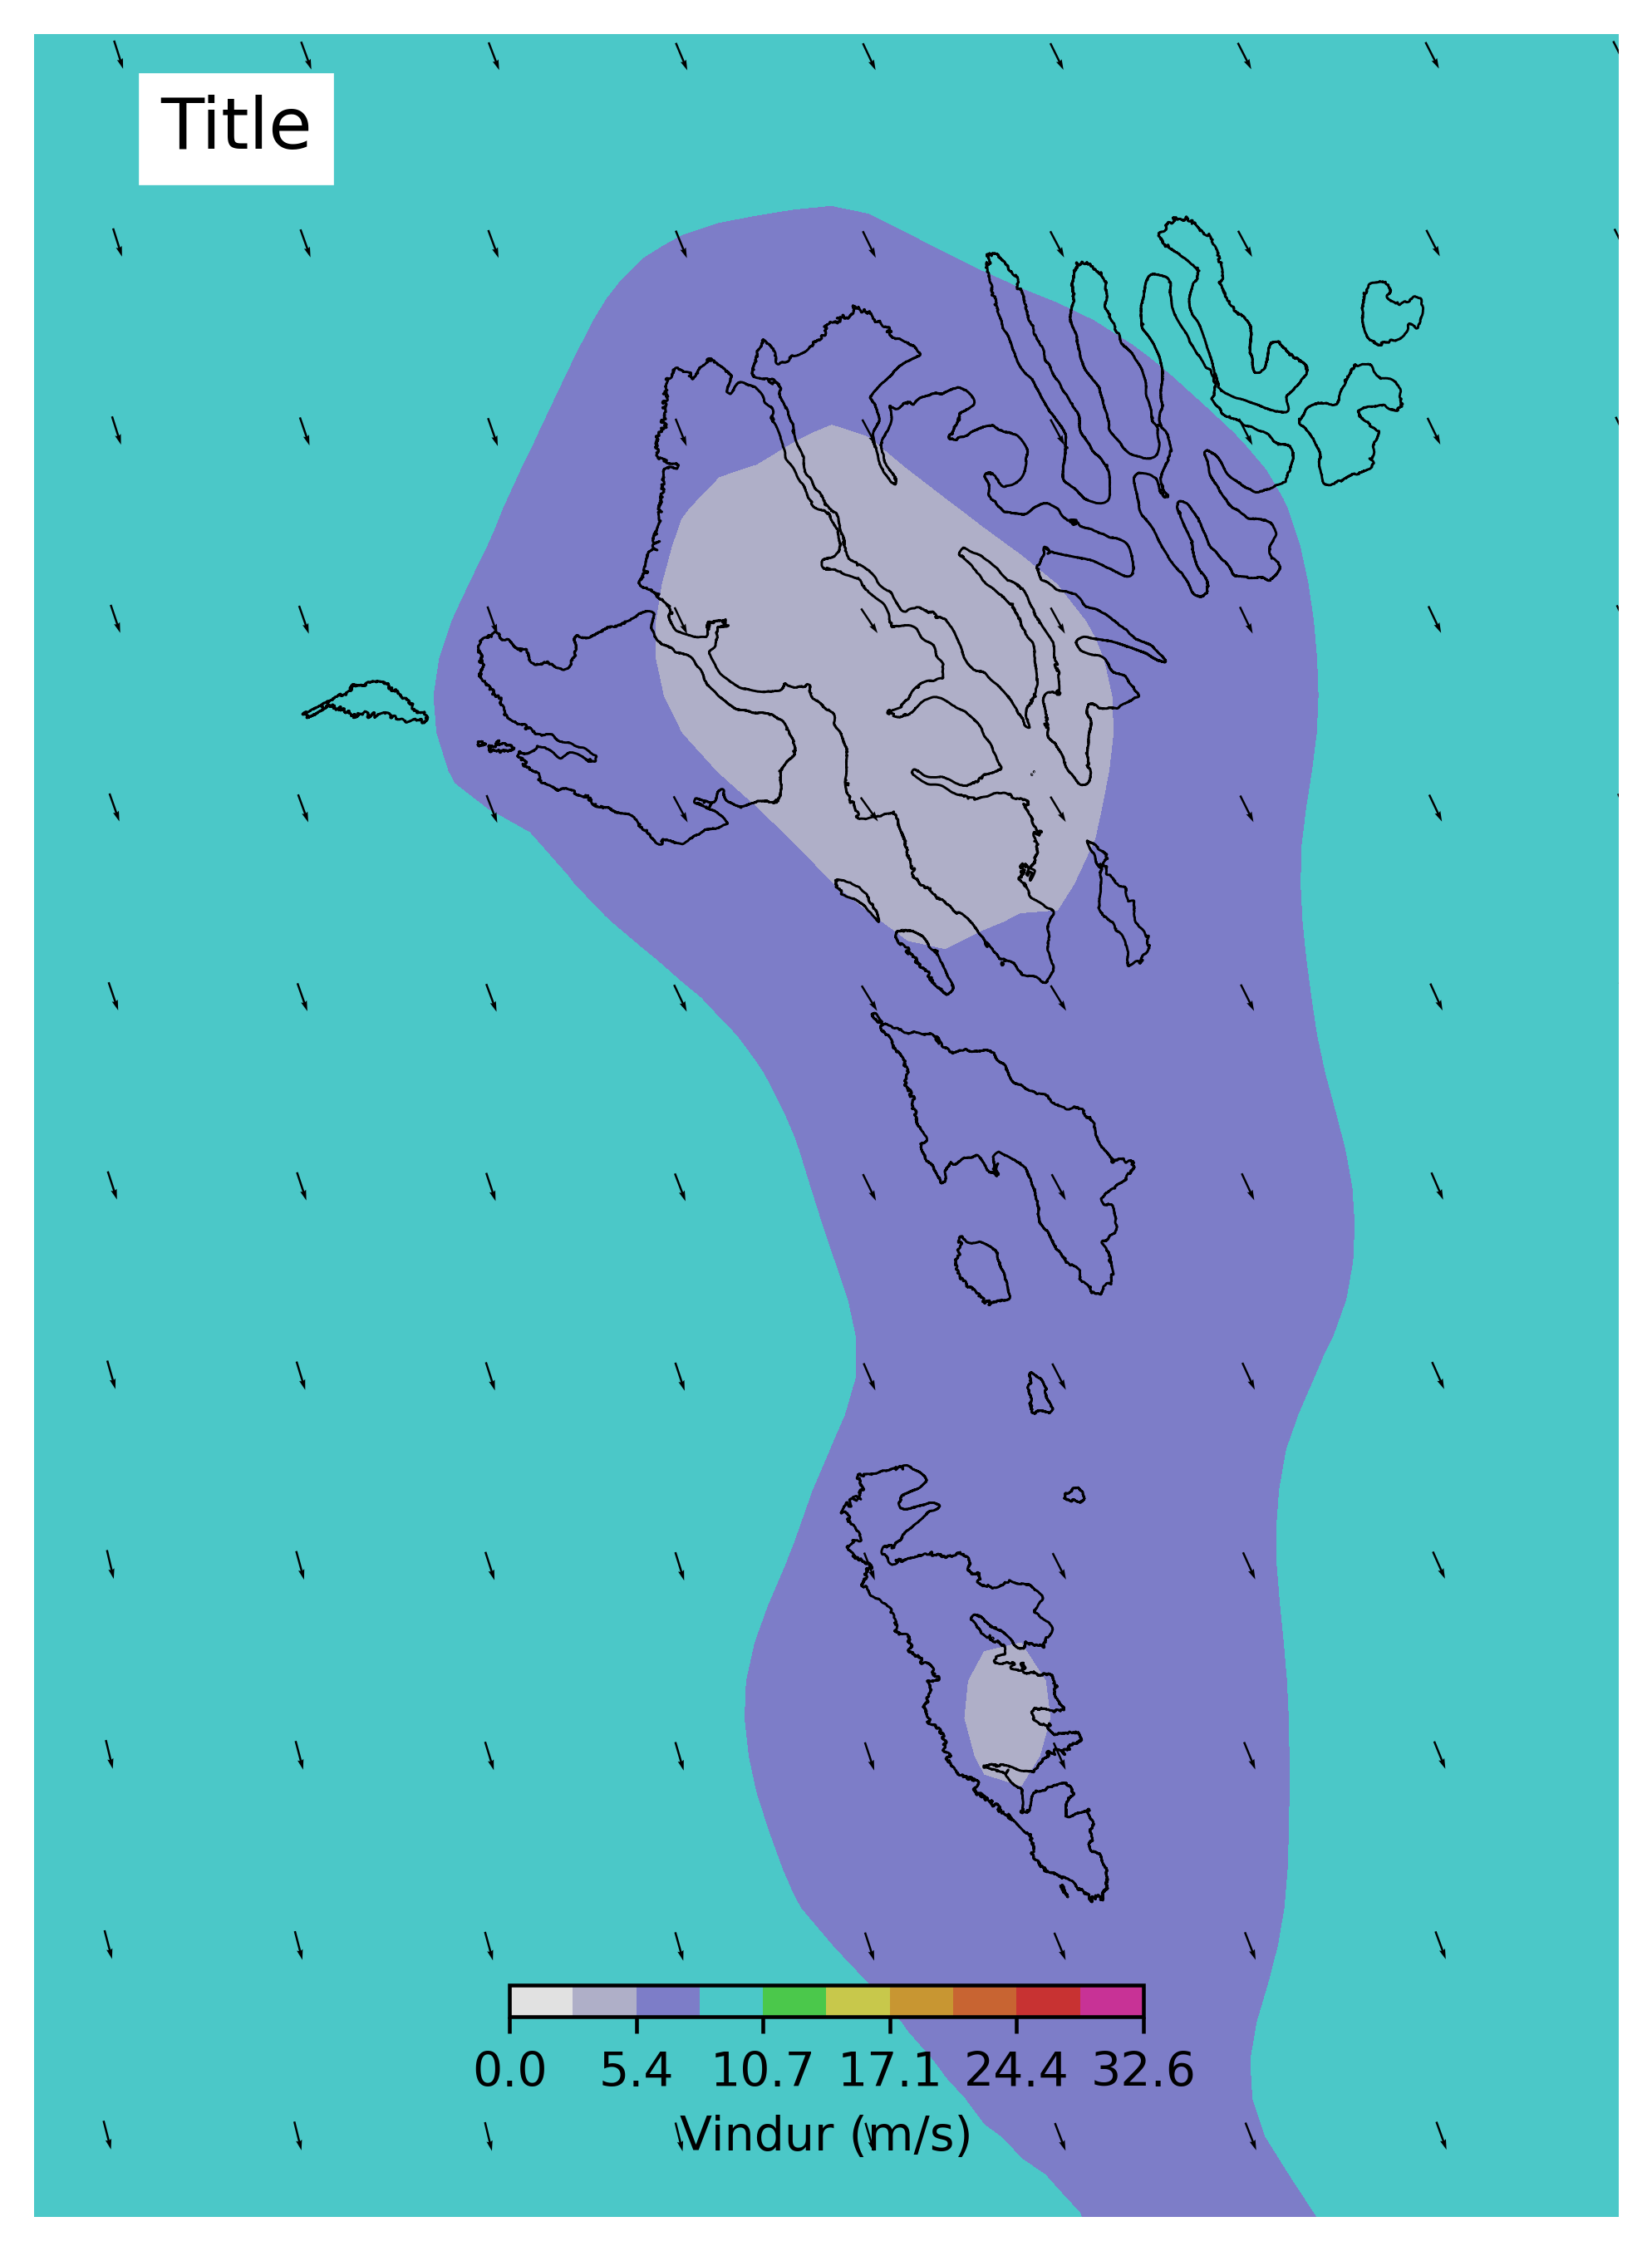

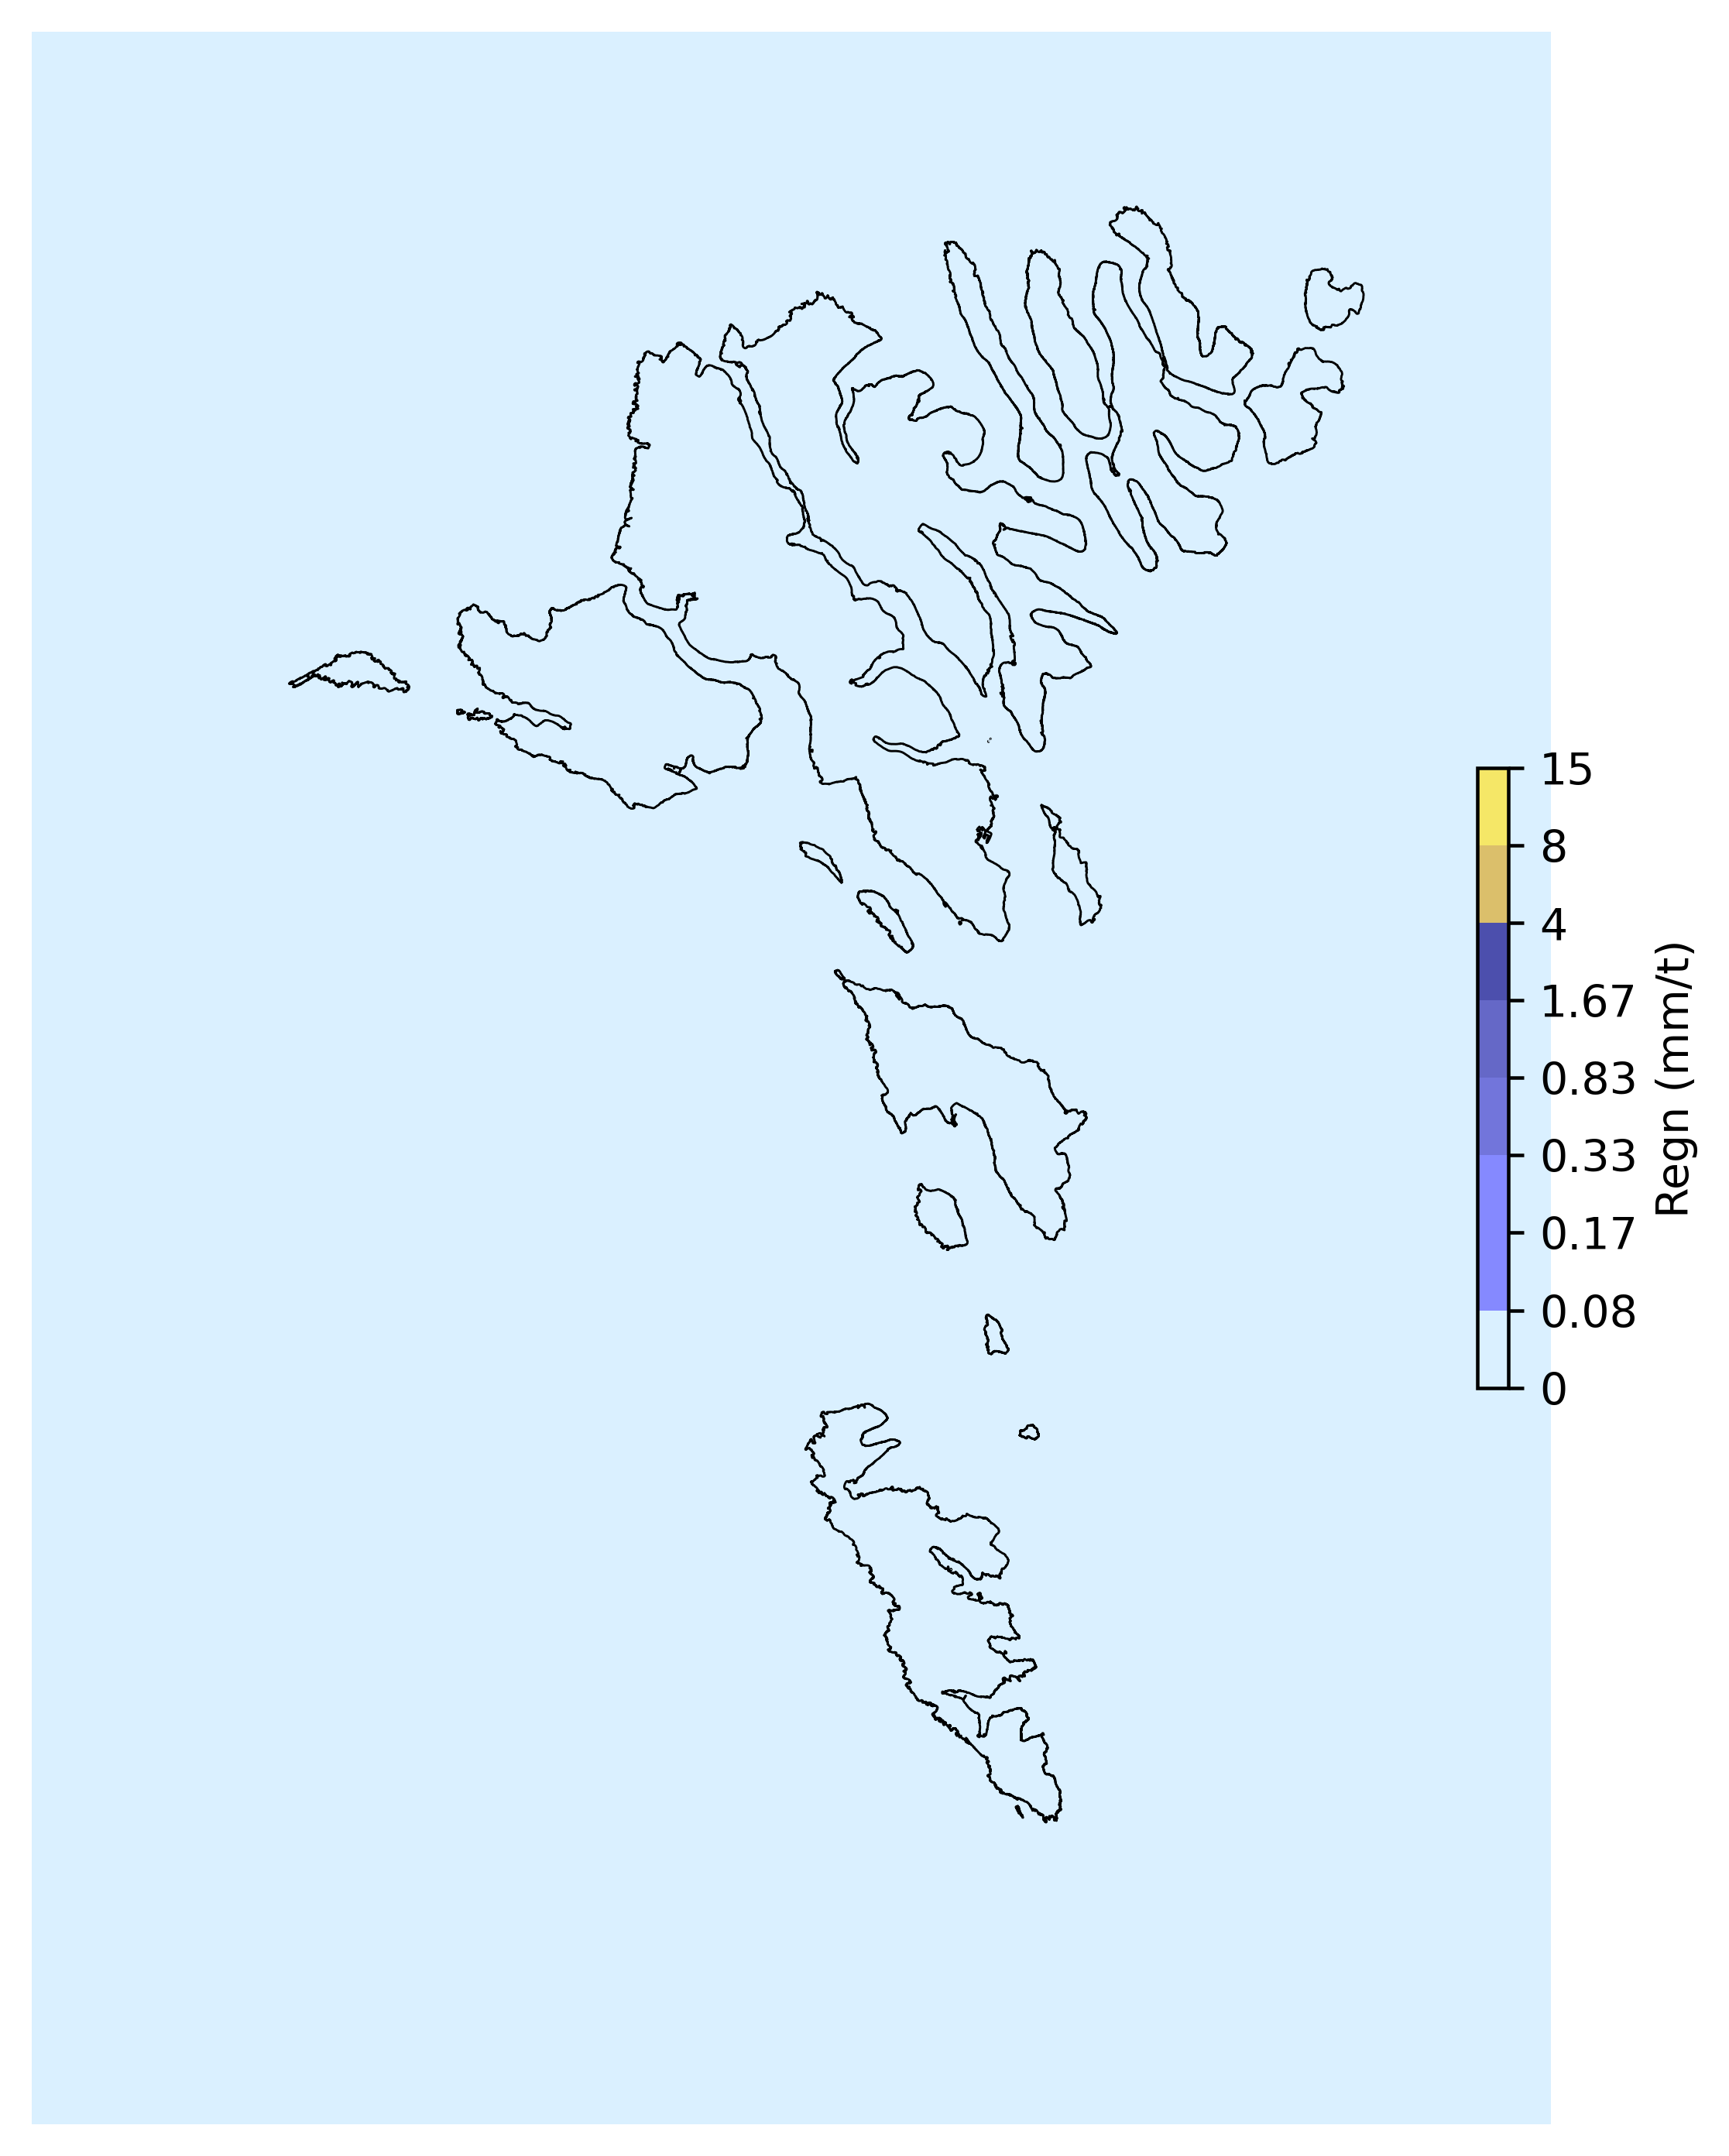

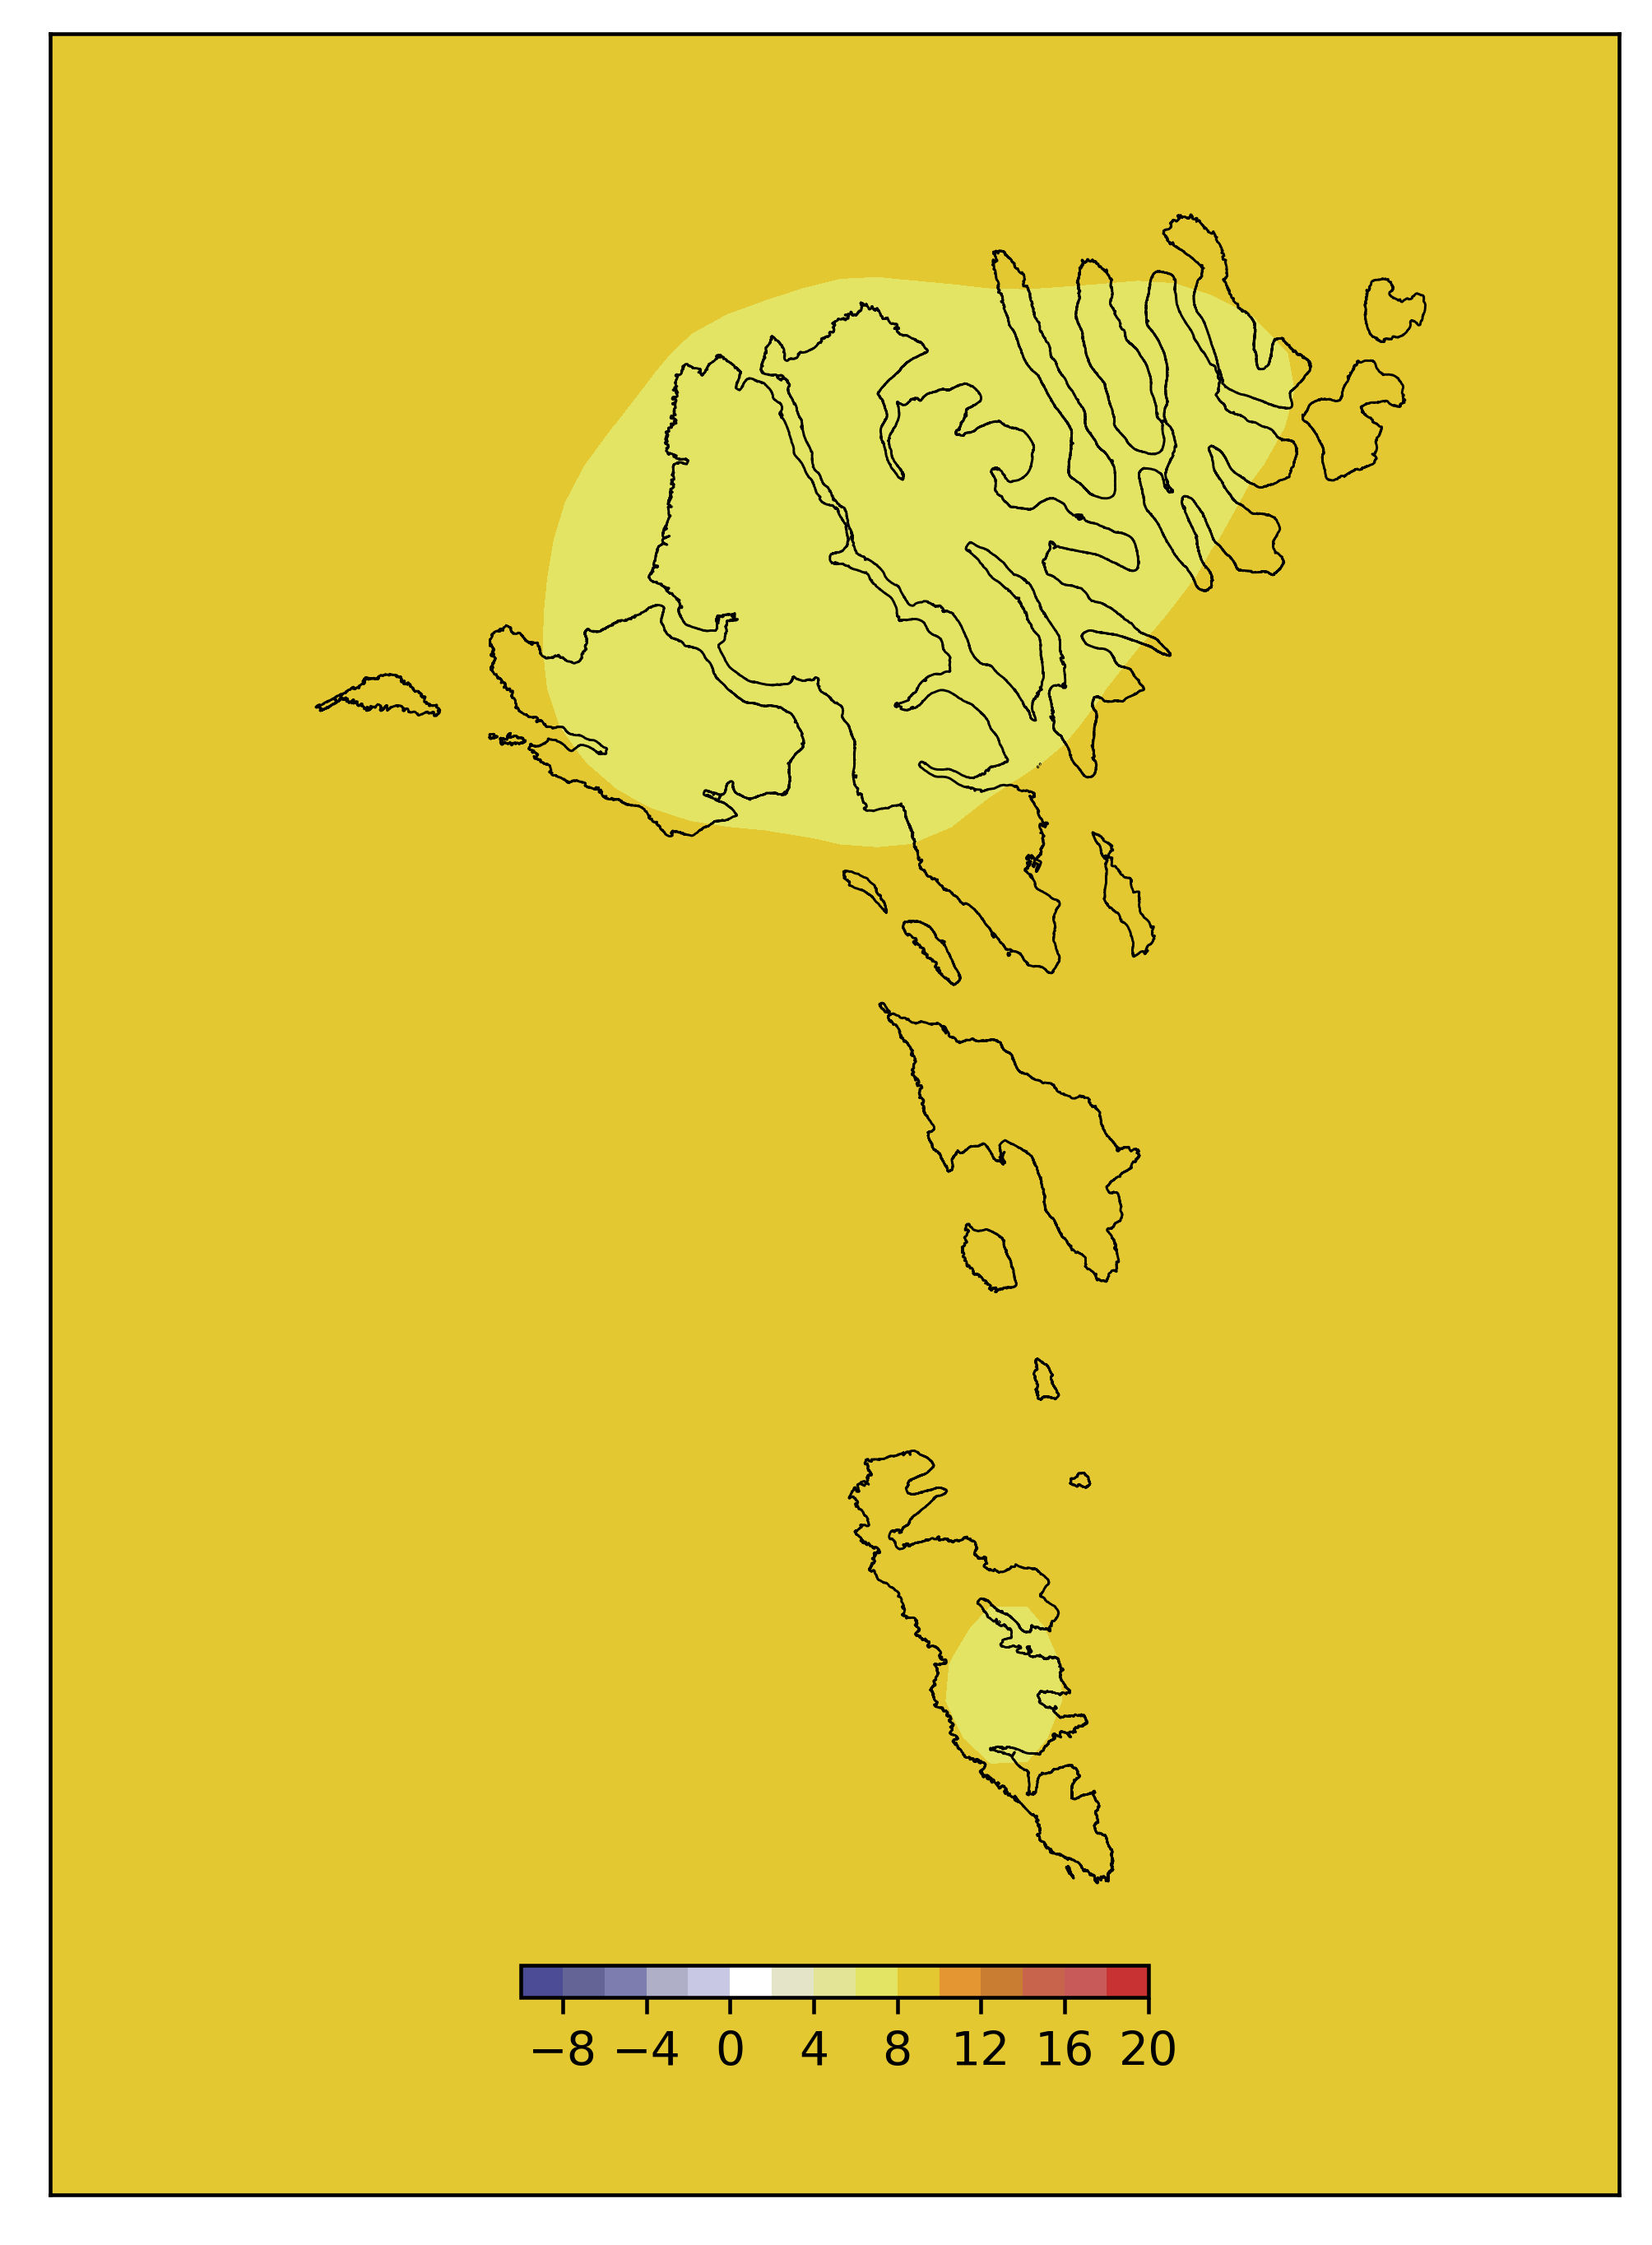

In [12]:
title = 'Title'
#Calling the different plot functions
#OBS! Remember to run all the otehr lines below before
#running this line. None of the functions are defined yet..

#Working plots for d01
SaveFileName = 'wrf-wind-waters-test.png'
plot_wind_waters(y, x, windspeed, uquiver, vquiver, psfc, SaveFileName)

SaveFileName = 'wrf-precipitation-waters.png'
plot_precipitation_waters(y, x, precip, snow, psfc,SaveFileName)

SaveFileName = 'wrf-t2-waters.png'
plot_t2_waters(y, x, t2, SaveFileName)

SaveFileName = 'wrf-wind-local.png'
plot_wind_local(y, x, windspeed, uquiver, vquiver, psfc, SaveFileName)

SaveFileName = 'wrf-precipitation-local.png'
plot_precipitation_local(y, x, precip, snow, psfc,SaveFileName)

SaveFileName = 'wrf-t2-local.png'
plot_t2_local(y, x, t2, SaveFileName)


# #Working plots for d02

# SaveFileName = 'wrf-wind-local.png'
# plot_wind_local(y, x, windspeed, uquiver, vquiver, psfc, SaveFileName)

# SaveFileName = 'wrf-precipitation-local.png'
# plot_precipitation_local(y, x, precip, snow, psfc,SaveFileName)

# SaveFileName = 'wrf-t2-local.png'
# plot_t2_local(y, x, t2, SaveFileName)



#Currently not working
# plot_clouds_local(y, x, c1, psfc,SaveFileName)

In [8]:
#Define plot functions

#Defining all the functions

def save_optimized_image(SaveFileName):
    try:
        with Image.open(SaveFileName) as im:
            im_width, im_height = im.size
            im_resize = im.resize((im_width // 3, im_height // 3))

            im_rgb = im_resize.convert('RGB')
            im_rgb.save(f"{NewSaveFileName}", optimize=True, quality=70)
            im_rgb.save(f"{NewSaveFileName2}", optimize=True, quality=70)
    except OSError as e:
        print(e)
        pass

    
    


# from helpers import save_optimized_image


def generate_waters_plot(y, x):
    plot = Basemap(
        resolution='l',
        projection='stere',
        lat_0=62,
        lon_0=353,
        llcrnrlat=59.7,
        llcrnrlon=-14,
        urcrnrlat=64,
        urcrnrlon=0,
    )
    
    plot.drawcoastlines()
    plot.readshapefile('Miscellaneous/Oyggjar', 'Oyggjar')
    plot.readshapefile('Miscellaneous/Ytribanki', 'Ytribanki',color='blue')
    plot.readshapefile('Miscellaneous/Munkagrunnur', 'Munkagrunnur',color='blue')
    plot.readshapefile('Miscellaneous/Fugloyarbanki', 'Fugloyarbanki',color='blue')
    plot.readshapefile('Miscellaneous/Islandsryggur', 'Islandsryggur',color='blue')
    plot.readshapefile('Miscellaneous/Fiskimark1','Fiskimark1',color='red')
    plot.readshapefile('Miscellaneous/Fiskimark2','Fiskimark2',color='red')
    return plot(x, y)


def generate_local_plot(y, x):
    plot = Basemap(
        resolution='l',
        projection='stere',
        lat_0=62,
        lon_0=353,
        llcrnrlat=61.2,
        llcrnrlon=-8,
        urcrnrlat=62.5,
        urcrnrlon=-6,
    )
    
    plot.drawcoastlines()
    plot.readshapefile('Miscellaneous/Oyggjar', 'Oyggjar')
#     plot.readshapefile('shapefiles/Ytribanki', 'Ytribanki',color='blue')
#     plot.readshapefile('shapefiles/Munkagrunnur', 'Munkagrunnur',color='blue')
#     plot.readshapefile('shapefiles/Fugloyarbanki', 'Fugloyarbanki',color='blue')
#     plot.readshapefile('shapefiles/Islandsryggur', 'Islandsryggur',color='blue')
#     plot.readshapefile('shapefiles/Fiskimark1','Fiskimark1',color='red')
#     plot.readshapefile('shapefiles/Fiskimark2','Fiskimark2',color='red')
    return plot(x, y)

def plot_wind_waters(y, x, windspeed, uquiver, vquiver, psfc, SaveFileName):
    fig, ax = plt.subplots(
        figsize=(21, 9),
        dpi=410.1,
        frameon=False
    )
    wind_lons, wind_lats = generate_waters_plot(y, x)

    levels = [0, 3.3, 5.4, 7.9, 10.7, 13.8, 17.1, 20.7, 24.4, 28.4, 32.6]

    colorstring=[
        '#e1e1e1',
        '#afafc8',
        '#7d7dc8',
        '#4bc8c8',
        '#4bc84b',
        '#c8c84b',
        '#c89632',
        '#c86432',
        '#c83232',
        '#c83296',
        '#9664c8'
    ]

    contour0 = ax.contourf(wind_lons, wind_lats, windspeed, levels=levels,colors=colorstring)
    k = 5
    ax.quiver(
        wind_lons[::k, ::k],
        wind_lats[::k, ::k],
        uquiver[::k, ::k],
        vquiver[::k, ::k],
        color="black",
        scale_units='inches',
        scale=75,
        width=0.0011,
        pivot='mid'
    )

            
    levels = range(800,1100,4)
    contour3 = ax.contour(wind_lons,wind_lats,psfc,levels=levels,colors='black')
    
    ax.axis('off')

    #Printing Colorbar
    cbar = plt.colorbar(contour0, ax=ax, extend="neither",location="bottom", pad=-0.2, fraction=0.021, shrink=0.3, orientation='horizontal')
    cbar.ax.tick_params(labelsize=10)
    cbar.set_label(label='Vindur (m/s)',size=10)
    
    contourlabel1 = ax.clabel(contour3, contour3.levels, inline=1, fontsize=12,inline_spacing=100)
    
    fig.savefig(SaveFileName, bbox_inches='tight', pad_inches = 0)
    save_optimized_image(SaveFileName) 
    
def plot_wind_local(y, x, windspeed, uquiver, vquiver, psfc, SaveFileName):
    fig, ax = plt.subplots(
        figsize=(6, 9),
        dpi=410.1,
        frameon=False
    )
    wind_lons, wind_lats = generate_local_plot(y, x)

    levels = [0, 3.3, 5.4, 7.9, 10.7, 13.8, 17.1, 20.7, 24.4, 28.4, 32.6]

    colorstring=[
        '#e1e1e1',
        '#afafc8',
        '#7d7dc8',
        '#4bc8c8',
        '#4bc84b',
        '#c8c84b',
        '#c89632',
        '#c86432',
        '#c83232',
        '#c83296',
        '#9664c8'
    ]

    contour0 = ax.contourf(wind_lons, wind_lats, windspeed, levels=levels,colors=colorstring)
    k = 5
    ax.quiver(
        wind_lons[::k, ::k],
        wind_lats[::k, ::k],
        uquiver[::k, ::k],
        vquiver[::k, ::k],
        color="black",
        scale_units='inches',
        scale=115,
        width=0.0013,
        pivot='mid'
    )

            
    levels = range(800,1100,4)
    contour3 = ax.contour(wind_lons,wind_lats,psfc,levels=levels,colors='black')
    
    ax.axis('off')

    #Printing Colorbar
    cbar = plt.colorbar(contour0, ax=ax, extend="neither",location="bottom", pad=-0.1, fraction=0.021, shrink=0.4, orientation='horizontal')
    cbar.ax.tick_params(labelsize=10)
    cbar.set_label(label='Vindur (m/s)',size=10)
    
    contourlabel1 = ax.clabel(contour3, contour3.levels, inline=1, fontsize=12,inline_spacing=100)
    
     #Set title
    ax.set_title(title, loc='left',y=0.98, x=0.08, pad=-15, fontdict={'fontsize': 15},backgroundcolor='white')
    
    fig.savefig(SaveFileName, bbox_inches='tight', pad_inches = 0)
    save_optimized_image(SaveFileName) 
    
def plot_clouds_local(y, x, c1, psfc,SaveFileName):
    fig, ax = plt.subplots(
        figsize=(6, 9),
        dpi=410.1,
        frameon=False
    )
    lons, lats = generate_local_plot(y, x)

    
    #Plotting clouds
    
#     #High clouds
#     levels = [-0.01, 25, 35, 70, 90, 101]
#     colorstring1=['#daf0ff', '#c7c7ff', '#aeaefc', '#9696fa', '#5454ff']
#     ax.contourf(lons, lats, c3*100, levels=levels, colors=colorstring1,alpha=0.7)
    
    levels = [35, 55, 70, 95, 101]
    
#     #Medium Clouds
#     colorstring2=['#c7fa9b', '#b9fa50', '#82fa19', '#7efa19']    
#     ax.contourf(lons, lats, c2*100, levels=levels, colors=colorstring2,alpha=0.8)
    
    #Clouds
    colorstring3=['#d2d2d2', '#b4b4b4', '#8c8c8c', '#646464']
    contour0 = ax.contourf(lons, lats, c1*100, levels=levels, colors=colorstring3)

#     levels = range(800,1100,4)
#     contour3 = ax.contour(lons,lats,psfc,levels=levels,colors='black')
    
    
#     #Plotting airmass temperature in different color intervals
#     levels = range(-40,-6,2)
#     contour4 = ax.contour(lons,lats,temp850,levels=levels,colors='#3232e1',linestyles='solid')
    
#     levels = [-4, -2, 0]
#     contour5 =ax.contour(lons,lats,temp850,levels=levels,colors='#960096',linestyles='solid')
    
#     levels = range(2,40,2)
#     contour6 =ax.contour(lons,lats,temp850,levels=levels,colors='#e13232',linestyles='solid')
    
    
    ax.axis('off')
    
    #Drawing the colormap of low clouds
    cbar = plt.colorbar(contour0, ax=ax, extend="neither",location="bottom", pad=-0.2, fraction=0.021, shrink=0.3, orientation='horizontal')
    cbar.ax.set_xticklabels(['10', '25', '50', '75', '100'])
    cbar.ax.tick_params(labelsize=10)
    cbar.set_label(label='Skýloft (%)',size=10)
    
    #Placing text on contour labels
    contourlabel1 = ax.clabel(contour3, contour3.levels, inline=True, fontsize=12,inline_spacing=100)
    contourlabel2 = ax.clabel(contour4, contour4.levels, inline=True, fontsize=12,inline_spacing=75)
    contourlabel3 = ax.clabel(contour5, contour5.levels, inline=True, fontsize=12,inline_spacing=75)
    contourlabel4 = ax.clabel(contour6, contour6.levels, inline=True, fontsize=12,inline_spacing=75)

    fig.savefig(SaveFileName, bbox_inches='tight', pad_inches = 0)
    save_optimized_image(SaveFileName)


def plot_precipitation_waters(y, x, precip, snow, psfc,SaveFileName):
    fig, ax = plt.subplots(
        figsize=(21, 9),
        dpi=410.1,
        frameon=False
    )
    lons, lats = generate_waters_plot(y, x)

    
    #Plotting rain
#     levels = [-0.01, 0.08, 0.17, 0.33, 0.83, 1.67, 4, 8, 15]
    levels = [-0.01, 0.008, 0.017, 0.033, 0.083, 0.167, 0.4, 0.8, 1.5]
    colorstring=['#daf0ff','#8589ff', '#8589ff', '#7275db', '#6568c7', '#4c4fad', '#dbbf6b', '#f5e767']
    contour1 = ax.contourf(lons, lats, precip, levels=levels, colors=colorstring)

    
#     #Plotting snow
#     levels = [0.17, 0.33, 0.83, 1.67, 2.5, 10]
#     colorstring=['#e6d0f2', '#c091d9', '#9a63b8', '#7c419c', '#750c42']
#     contour2 = ax.contourf(lons, lats, snow, levels=levels, colors=colorstring)

#     levels = range(800,1100,4)
#     contour3 = ax.contour(lons,lats,mslp,levels=levels,colors='black')
    
    
#     #Plotting airmass temperature in different color intervals
#     levels = range(-40,-6,2)
#     contour4 = ax.contour(lons,lats,temp850,levels=levels,colors='#3232e1',linestyles='solid')
    
#     levels = [-4, -2, 0]
#     contour5 =ax.contour(lons,lats,temp850,levels=levels,colors='#960096',linestyles='solid')
    
#     levels = range(2,40,2)
#     contour6 =ax.contour(lons,lats,temp850,levels=levels,colors='#e13232',linestyles='solid')
    
    
    ax.axis('off')
    
    
    
#     cbar2 = plt.colorbar(contour2, ax=ax, extend="neither",location="right", pad=-0.07, fraction=0.021, shrink=0.3, orientation='vertical')
#     cbar2.ax.set_yticklabels([0.17, 0.33, 0.83, 1.67, 2.5, 10])
#     cbar2.ax.tick_params(labelsize=10)
#     cbar2.set_label(label='Kavi (cm/t)',size=10)

    cbar1 = plt.colorbar(contour1, ax=ax, extend="neither",location="right", pad=-0.05, fraction=0.021, shrink=0.3, orientation='vertical')
    cbar1.ax.set_yticklabels([0, 0.08, 0.17, 0.33, 0.83, 1.67, 4, 8, 15])
    cbar1.ax.tick_params(labelsize=10)
    cbar1.set_label(label='Regn (mm/t)',size=10)
    
#     #Placing text on contour labels
#     contourlabel1 = ax.clabel(contour3, contour3.levels, inline=True, fontsize=12,inline_spacing=100)
#     contourlabel2 = ax.clabel(contour4, contour4.levels, inline=True, fontsize=12,inline_spacing=75)
#     contourlabel3 = ax.clabel(contour5, contour5.levels, inline=True, fontsize=12,inline_spacing=75)
#     contourlabel4 = ax.clabel(contour6, contour6.levels, inline=True, fontsize=12,inline_spacing=75)

    fig.savefig(SaveFileName, bbox_inches='tight', pad_inches = 0)
    save_optimized_image(SaveFileName)
    
    
def plot_precipitation_local(y, x, precip, snow, psfc,SaveFileName):
    fig, ax = plt.subplots(
        figsize=(6, 9),
        dpi=410.1,
        frameon=False
    )
    lons, lats = generate_local_plot(y, x)

    
    #Plotting rain
#     levels = [-0.01, 0.08, 0.17, 0.33, 0.83, 1.67, 4, 8, 15]
    levels = [-0.01, 0.008, 0.017, 0.033, 0.083, 0.167, 0.4, 0.8, 1.5]
    colorstring=['#daf0ff','#8589ff', '#8589ff', '#7275db', '#6568c7', '#4c4fad', '#dbbf6b', '#f5e767']
    contour1 = ax.contourf(lons, lats, precip, levels=levels, colors=colorstring)

    
#     #Plotting snow
#     levels = [0.17, 0.33, 0.83, 1.67, 2.5, 10]
#     colorstring=['#e6d0f2', '#c091d9', '#9a63b8', '#7c419c', '#750c42']
#     contour2 = ax.contourf(lons, lats, snow, levels=levels, colors=colorstring)

#     levels = range(800,1100,4)
#     contour3 = ax.contour(lons,lats,mslp,levels=levels,colors='black')
    
    
#     #Plotting airmass temperature in different color intervals
#     levels = range(-40,-6,2)
#     contour4 = ax.contour(lons,lats,temp850,levels=levels,colors='#3232e1',linestyles='solid')
    
#     levels = [-4, -2, 0]
#     contour5 =ax.contour(lons,lats,temp850,levels=levels,colors='#960096',linestyles='solid')
    
#     levels = range(2,40,2)
#     contour6 =ax.contour(lons,lats,temp850,levels=levels,colors='#e13232',linestyles='solid')
    
    
    ax.axis('off')
    
    
    
#     cbar2 = plt.colorbar(contour2, ax=ax, extend="neither",location="right", pad=-0.07, fraction=0.021, shrink=0.3, orientation='vertical')
#     cbar2.ax.set_yticklabels([0.17, 0.33, 0.83, 1.67, 2.5, 10])
#     cbar2.ax.tick_params(labelsize=10)
#     cbar2.set_label(label='Kavi (cm/t)',size=10)

    cbar1 = plt.colorbar(contour1, ax=ax, extend="neither",location="right", pad=-0.05, fraction=0.021, shrink=0.3, orientation='vertical')
    cbar1.ax.set_yticklabels([0, 0.08, 0.17, 0.33, 0.83, 1.67, 4, 8, 15])
    cbar1.ax.tick_params(labelsize=10)
    cbar1.set_label(label='Regn (mm/t)',size=10)
    
#     #Placing text on contour labels
#     contourlabel1 = ax.clabel(contour3, contour3.levels, inline=True, fontsize=12,inline_spacing=100)
#     contourlabel2 = ax.clabel(contour4, contour4.levels, inline=True, fontsize=12,inline_spacing=75)
#     contourlabel3 = ax.clabel(contour5, contour5.levels, inline=True, fontsize=12,inline_spacing=75)
#     contourlabel4 = ax.clabel(contour6, contour6.levels, inline=True, fontsize=12,inline_spacing=75)

    fig.savefig(SaveFileName, bbox_inches='tight', pad_inches = 0)
    save_optimized_image(SaveFileName)

    
    
def plot_t2_waters(y, x, t2, SaveFileName):
    
    fig, ax = plt.subplots(
    figsize=(21, 9),
    dpi=410.1,
    frameon=False
    )
    lons, lats = generate_waters_plot(y, x)



    levels = [-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18,20]
    colorstring=['#4b4b96','#646496','#7d7daf','#afafc8','#c8c8e4','#ffffff','#e4e4c8','#e4e496','#e4e464','#e4c832','#e49632','#c87d32','#c8644b','#c85a5a','#c83232','#961919']
    contour0 = ax.contourf(lons, lats, t2, levels=levels,colors=colorstring)
    cbar = plt.colorbar(contour0, ax=ax, extend="neither",location="bottom", pad=-0.1, fraction=0.021, shrink=0.4, orientation='horizontal')
    
    
def plot_t2_local(y, x, t2, SaveFileName):
    
    fig, ax = plt.subplots(
    figsize=(6, 9),
    dpi=410.1,
    frameon=False
    )
    lons, lats = generate_local_plot(y, x)



    levels = [-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18,20]
    colorstring=['#4b4b96','#646496','#7d7daf','#afafc8','#c8c8e4','#ffffff','#e4e4c8','#e4e496','#e4e464','#e4c832','#e49632','#c87d32','#c8644b','#c85a5a','#c83232','#961919']
    contour0 = ax.contourf(lons, lats, t2, levels=levels,colors=colorstring)
    cbar = plt.colorbar(contour0, ax=ax, extend="neither",location="bottom", pad=-0.1, fraction=0.021, shrink=0.4, orientation='horizontal')
    


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pygrib as pgr
from PIL import Image
import datetime
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

#Do something else for this
SaveFileName = 'OverviewTest.png'
NewSaveFileName = 'OverviewTest_optimized.png'
NewSaveFileName2 = 'OverviewTest_optimized_2.png'



#Do something else for this
Filename = 'NEA_2023080406.042'
# Filename = 'harmonie-data/NEAData/NEA_2023040409.001'

grbs = pgr.open(Filename)


#Surface-variables
y, x = grbs.message(1).latlons() #regular lat/lon
u10=grbs.message(3).values
v10=grbs.message(4).values
windspeed=np.sqrt(u10**2+v10**2)
c1=grbs.message(5).values
c2=grbs.message(6).values
c3=grbs.message(7).values
t2=grbs.message(9).values-273.15
precip=grbs.message(10).values
snow=grbs.message(12).values
mslp=grbs.message(1).values/100
visibility = grbs.message(15).values
dewpoint = grbs.message(26).values
maxtemp = grbs.message(24).values-273.15
mintemp = grbs.message(25).values-273.15


#3d-variables
Filename = 'NEA_2023080406.042-3d-variables'
grbs = pgr.open(Filename)

temp850 = grbs.message(57).values-273.15


#Adjusting wind angles
#a, b, and c-side of the triangle
angle = np.ones((386,466))
lon_s = 25
lat_s = -60

#canculating angles
for i in range(386):
    for j in range(466):
        SB = np.sin(np.radians(x[i,j]-lon_s))*np.cos(np.radians(lat_s))
        CB = -np.sin(np.radians(lat_s))*np.cos(np.radians(y[i,j]))+np.cos(np.radians(lat_s))*np.sin(np.radians(y[i,j]))*np.cos(np.radians(x[i,j]-lon_s))
        angle[i,j] = np.rad2deg(np.arctan2(SB,CB))

#adjusting wind-direction with the b-angle
# The constant -9 has to be removed when we figure out how to adjust the angle correctly
direction=np.mod(180+np.rad2deg(np.arctan2(u10, v10)) + angle - 9,360)

#adjusted 10-meter wind speeds (u and v)
u11 = np.sin(np.radians(direction))*windspeed*(-1)
v11 = np.cos(np.radians(direction))*windspeed*(-1)
uquiver = u11 / np.sqrt(u11 ** 2 + v11 ** 2) * 10
vquiver = v11 / np.sqrt(u11 ** 2 + v11 ** 2) * 10



In [3]:
print(slp)

<xarray.DataArray 'slp' (south_north: 172, west_east: 220)>
array([[1007.2938 , 1007.2525 , 1007.2127 , ...,  998.818  ,  998.78015,
         998.74493],
       [1007.2961 , 1007.2553 , 1007.2159 , ...,  998.8144 ,  998.77673,
         998.7417 ],
       [1007.2995 , 1007.2589 , 1007.2201 , ...,  998.8106 ,  998.774  ,
         998.7387 ],
       ...,
       [1006.9674 , 1006.9237 , 1006.87256, ...,  996.0202 ,  995.9876 ,
         995.95526],
       [1006.95734, 1006.9158 , 1006.86566, ...,  995.98315,  995.95087,
         995.92084],
       [1006.9447 , 1006.9047 , 1006.8562 , ...,  995.945  ,  995.91425,
         995.8859 ]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 -12.5 -12.45 ... -2.082 -2.032
    XLAT     (south_north, west_east) float32 60.01 60.02 60.02 ... 63.88 63.88
    XTIME    float32 0.0
    Time     datetime64[ns] 2023-07-04
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY
    

In [4]:
c1 = getvar(ncfile, "cloudfrac")
print(c1)

<xarray.DataArray 'cloudfrac' (low_mid_high: 3, south_north: 172, west_east: 220)>
array([[[0.9894864 , 0.99207705, 0.99427825, ..., 0.73977447,
         0.7116342 , 0.64994353],
        [0.9858148 , 0.99083376, 0.99444276, ..., 0.6999512 ,
         0.690278  , 0.6707617 ],
        [0.98130983, 0.989375  , 0.99470156, ..., 0.68273896,
         0.6887833 , 0.69693357],
        ...,
        [0.9188684 , 0.9121042 , 0.90468234, ..., 0.99811524,
         0.9974908 , 0.99736667],
        [0.9120715 , 0.9111072 , 0.9059418 , ..., 0.99938476,
         0.9985773 , 0.9994324 ],
        [0.91148436, 0.9115524 , 0.9050012 , ..., 1.        ,
         1.        , 1.        ]],

       [[0.        , 0.        , 0.        , ..., 0.497424  ,
         0.4116275 , 0.31142792],
        [0.        , 0.        , 0.        , ..., 0.45135528,
         0.37597075, 0.28857392],
        [0.        , 0.        , 0.        , ..., 0.40616667,
         0.3432602 , 0.26956636],
...
        [0.2537326 , 0.27851287, 0